In [59]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 

In [61]:
data=pd.read_csv('cleaned_data.csv')

In [62]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [63]:
data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1


In [64]:
data['default payment next month'].mean()

0.2217971797179718

In [65]:
data.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [66]:
X=data['LIMIT_BAL'].values.reshape(-1,1)
y=data['default payment next month'].values

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred=model.predict(X_test)

In [71]:
is_correct=y_pred==y_test
np.mean(is_correct)

0.7834239639977498

In [72]:
model.score(X_test,y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [73]:
P=sum(y_test)
TP = sum( (y_test==1) & (y_pred==1) )
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N

In [74]:
print('TNR:',TNR)
print('TP:',TP)
print('FPR:',FPR)

TNR: 1.0
TP: 0
FPR: 0.0


In [75]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [76]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

In [77]:
prob_sum = np.sum(y_pred_prob,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [78]:
prob_sum.shape

(5333,)

In [79]:
np.unique(prob_sum)

array([1.])

In [80]:
pos_prob = y_pred_prob[:,1]
pos_prob

array([0.25173051, 0.4157029 , 0.2039552 , ..., 0.4157029 , 0.17278475,
       0.33606547])

Text(0, 0.5, 'Number of samples')

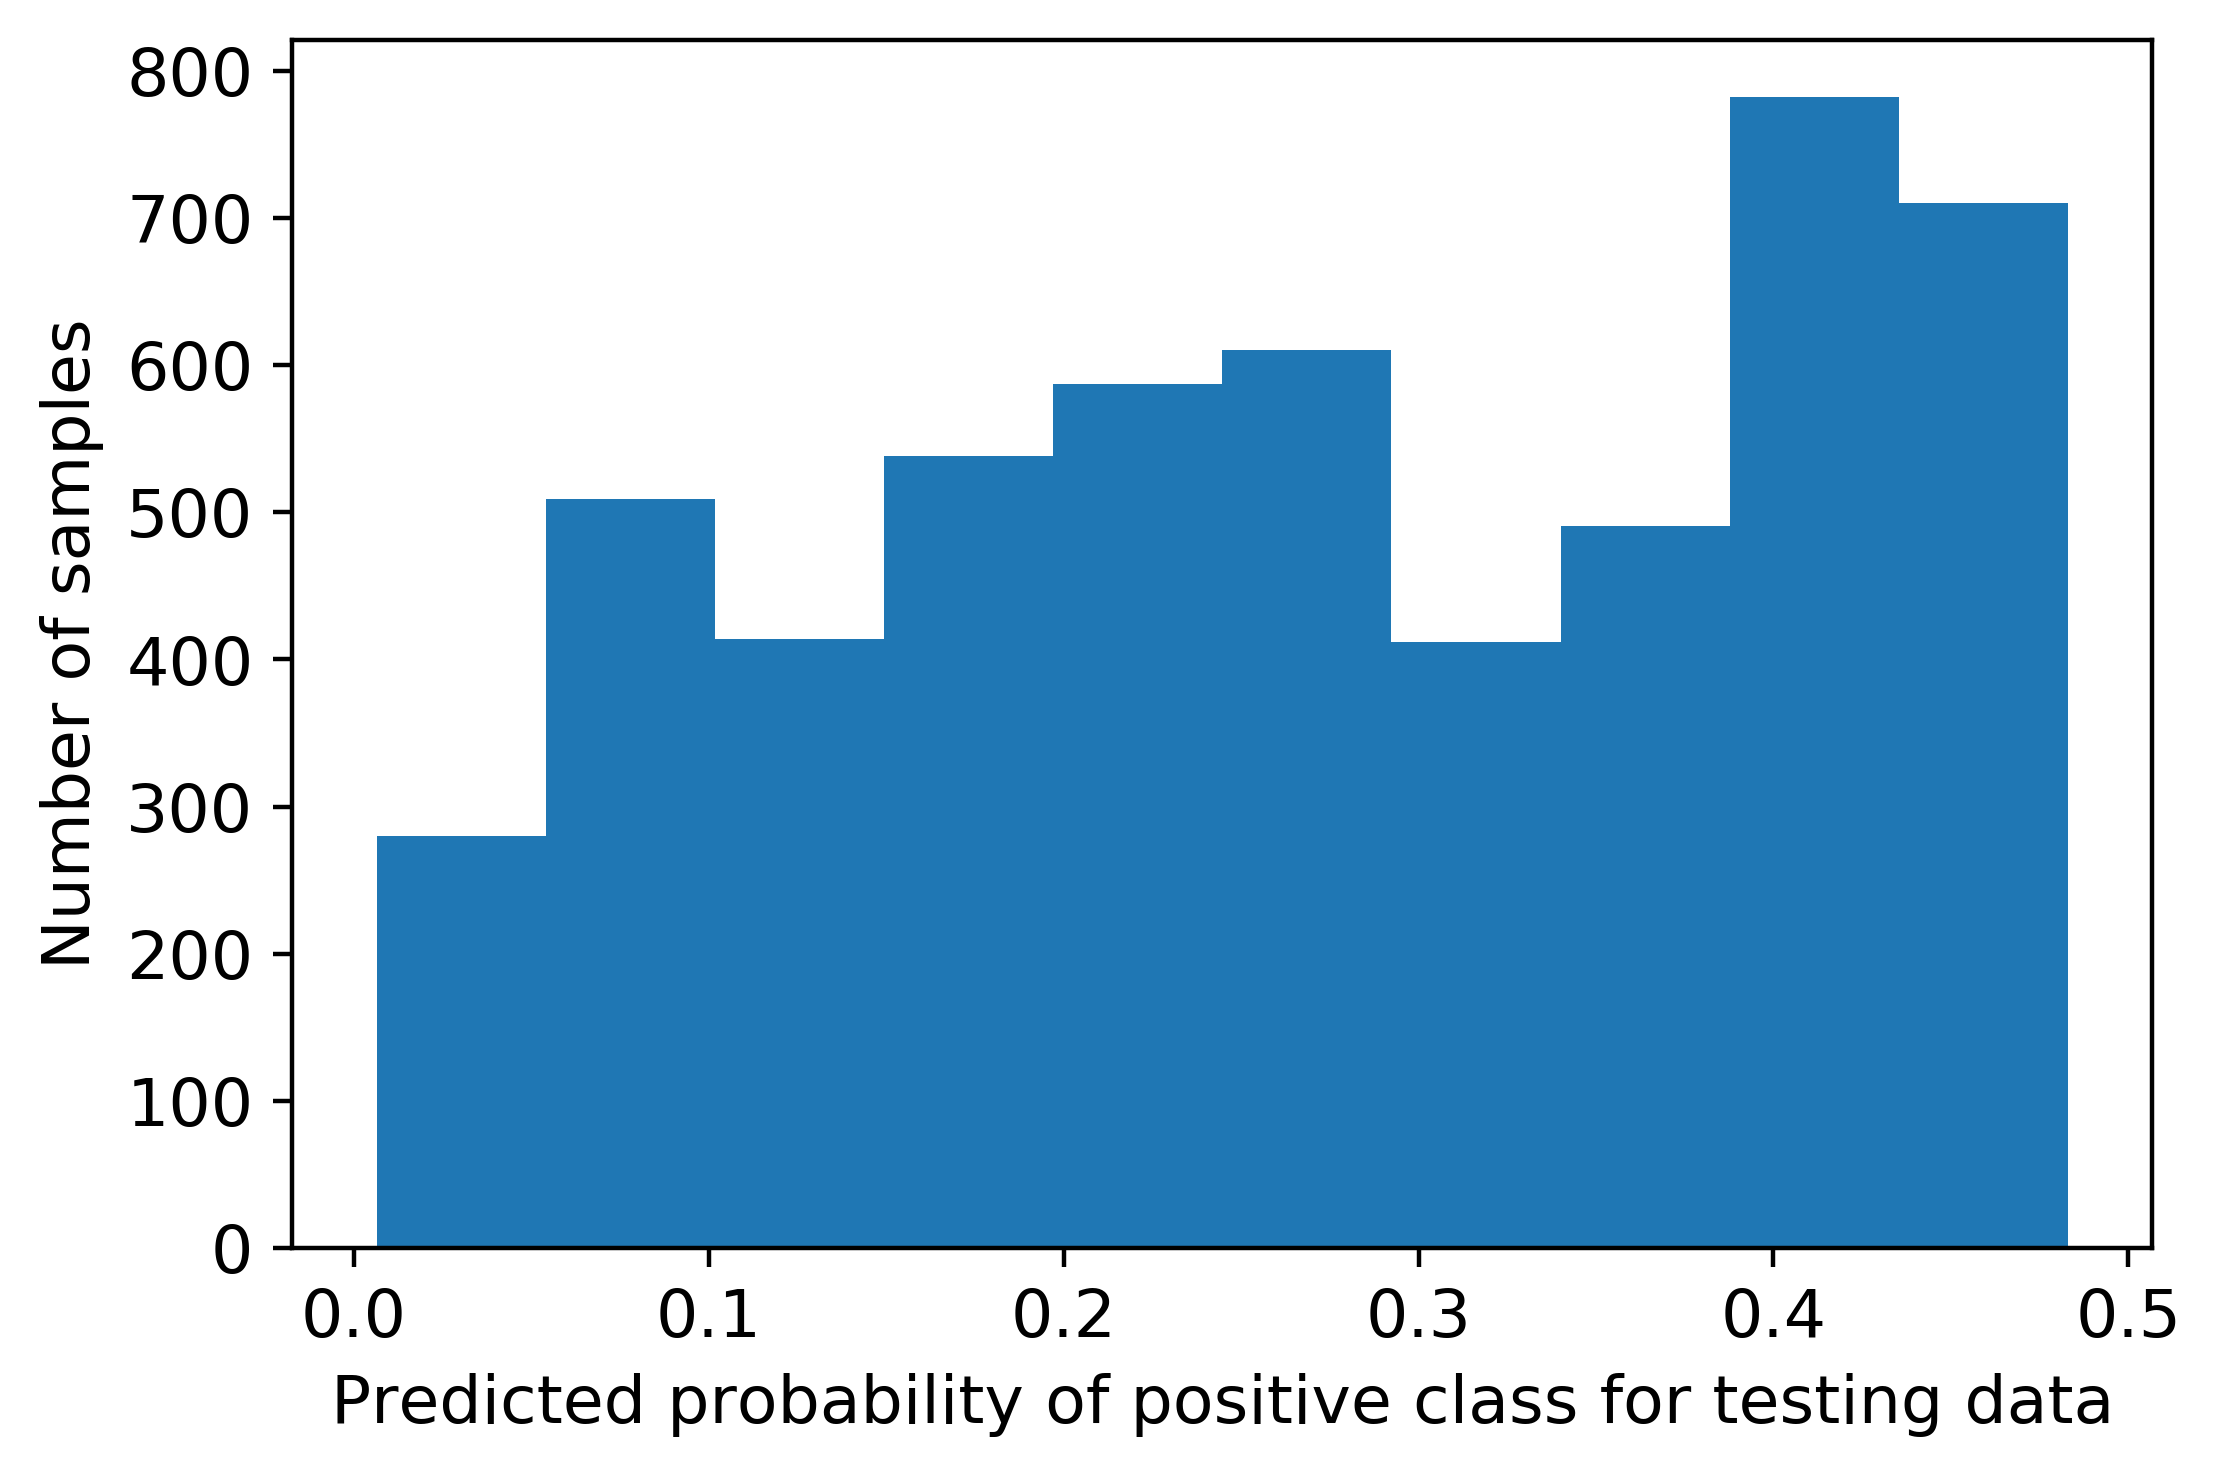

In [82]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_prob)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [83]:
pos_sample_pos_prob = pos_prob[y_test==1]
neg_sample_pos_prob = pos_prob[y_test==0]

Text(0, 0.5, 'Number of samples')

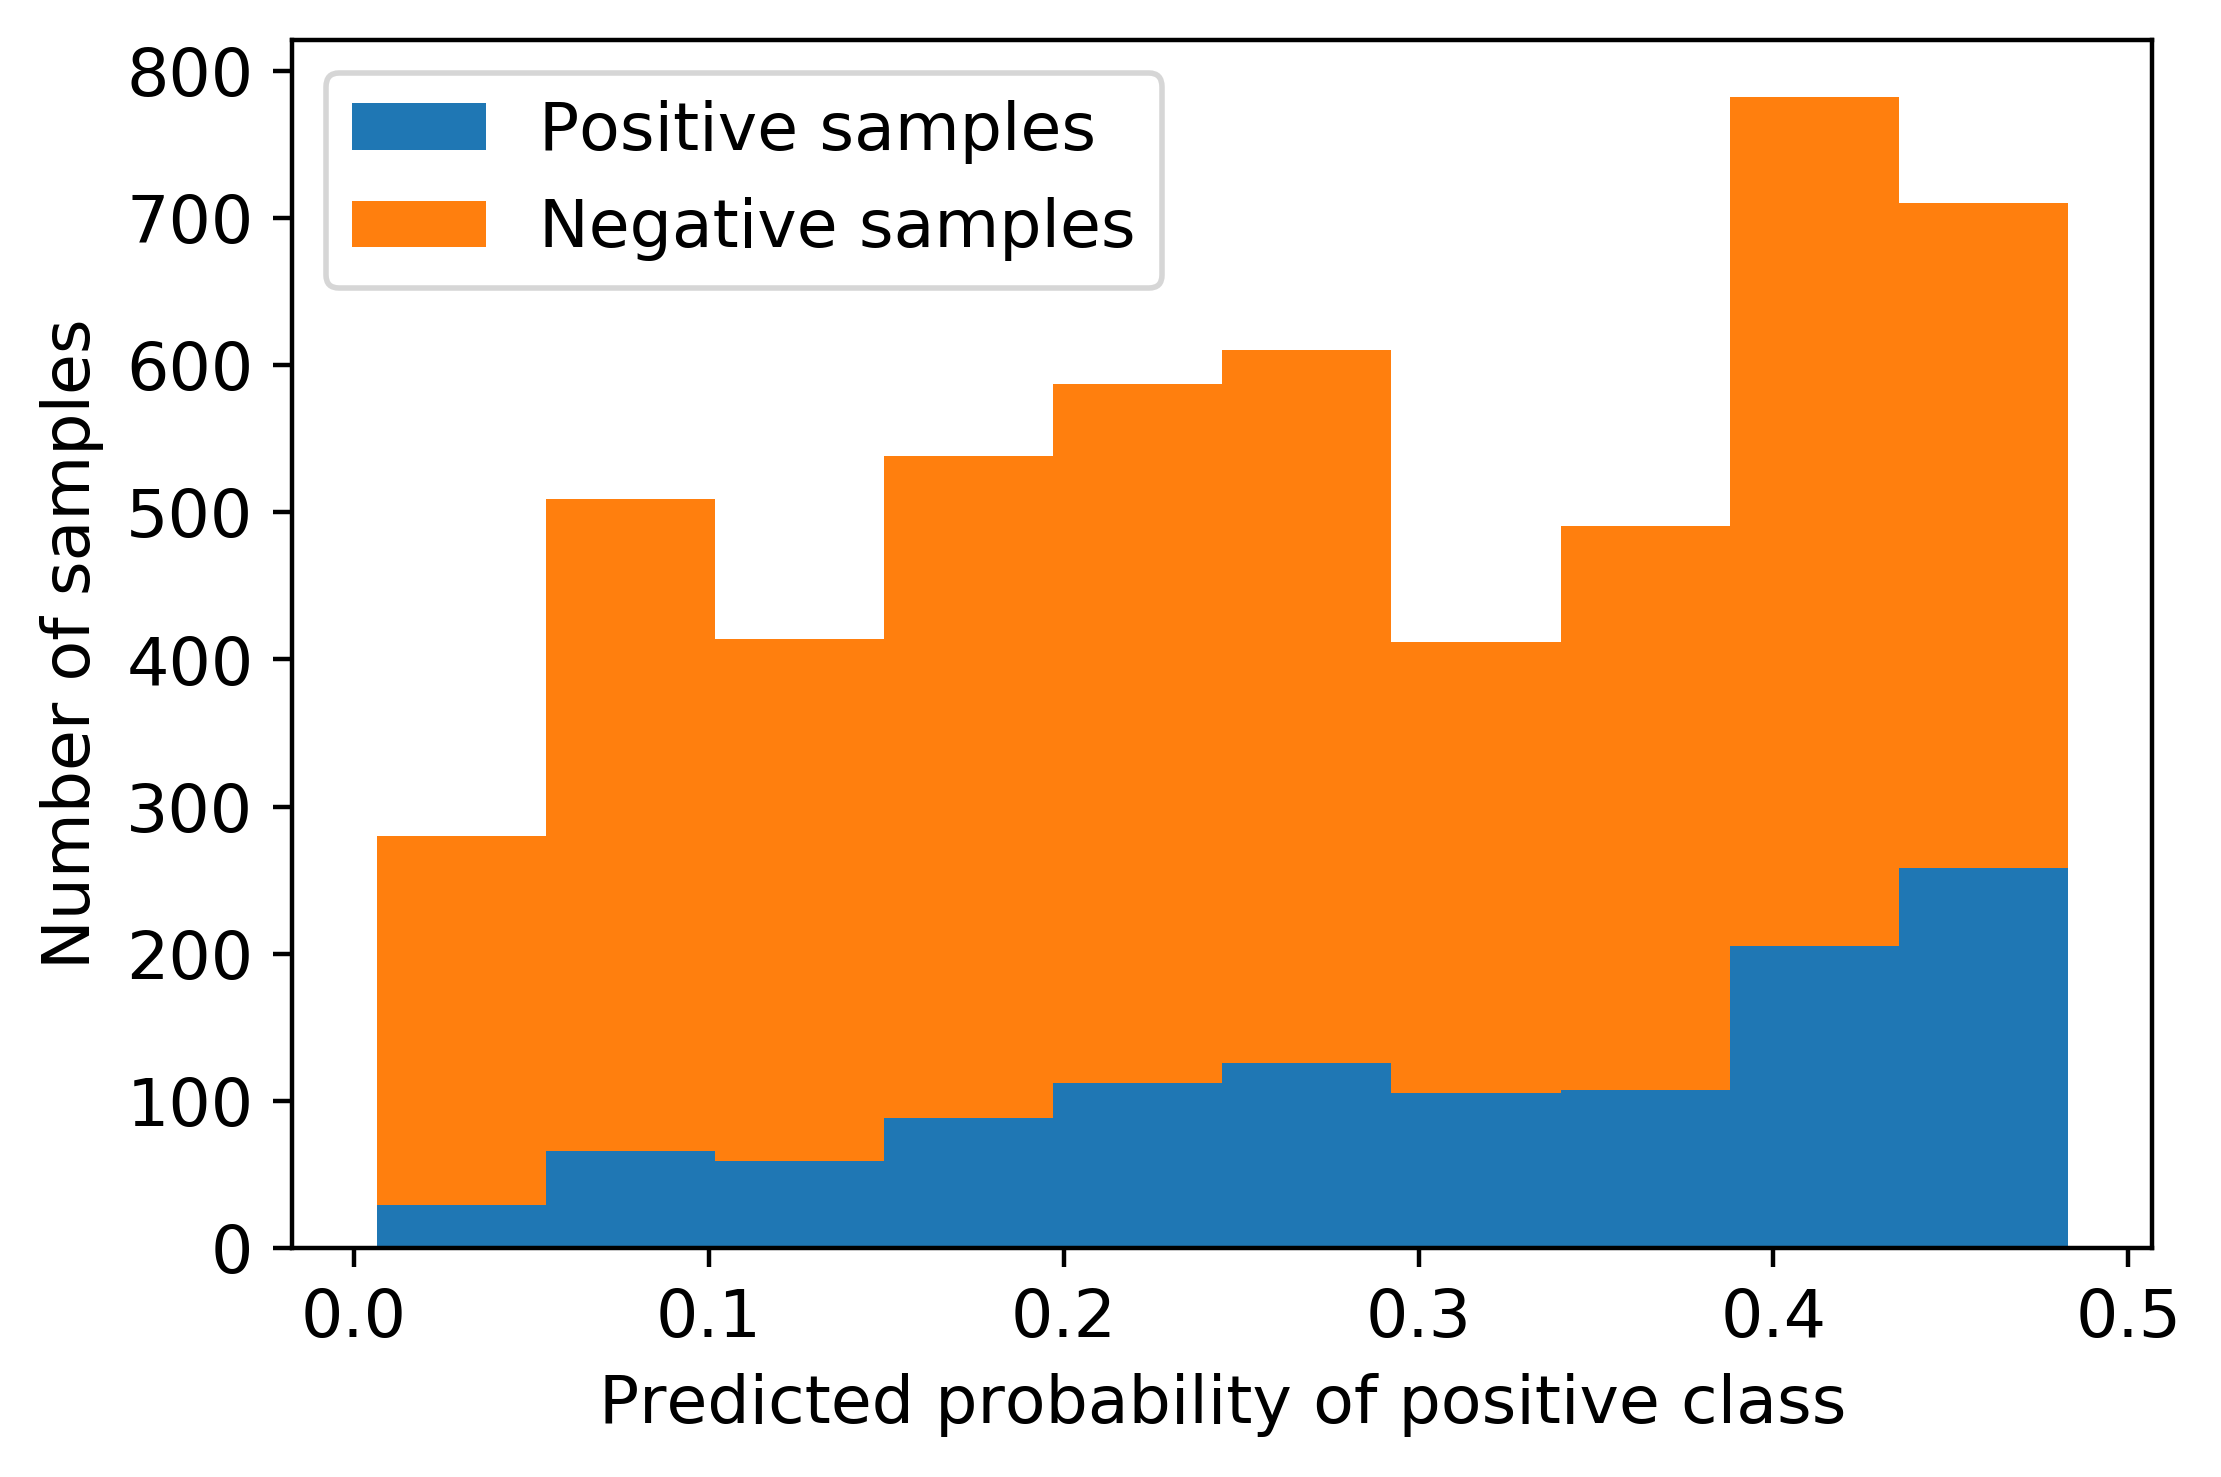

In [84]:
plt.hist([pos_sample_pos_prob, neg_sample_pos_prob], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


#### LIMIT_BAL feature

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_prob)
thresholds

array([1.48298463, 0.48298463, 0.46600863, 0.449111  , 0.43233001,
       0.4157029 , 0.39926548, 0.38305193, 0.36709445, 0.35142307,
       0.33606547, 0.3210468 , 0.30638957, 0.29211361, 0.27823599,
       0.26477108, 0.25173051, 0.23912333, 0.22695604, 0.21523272,
       0.2039552 , 0.19312317, 0.18273437, 0.17278475, 0.16326864,
       0.15417895, 0.14550731, 0.13724426, 0.1293794 , 0.12190156,
       0.11479893, 0.10805921, 0.10166973, 0.09561755, 0.0898896 ,
       0.08447273, 0.07935382, 0.07451986, 0.069958  , 0.06565559,
       0.06160024, 0.0577799 , 0.0541828 , 0.05079757, 0.0476132 ,
       0.04461906, 0.04180494, 0.03916104, 0.03667794, 0.03434666,
       0.03215862, 0.03010561, 0.02817986, 0.02637394, 0.02468081,
       0.0230938 , 0.02021314, 0.01890784, 0.01654049, 0.01546861,
       0.01446517, 0.0103345 , 0.00844129, 0.00789006, 0.00644174])

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

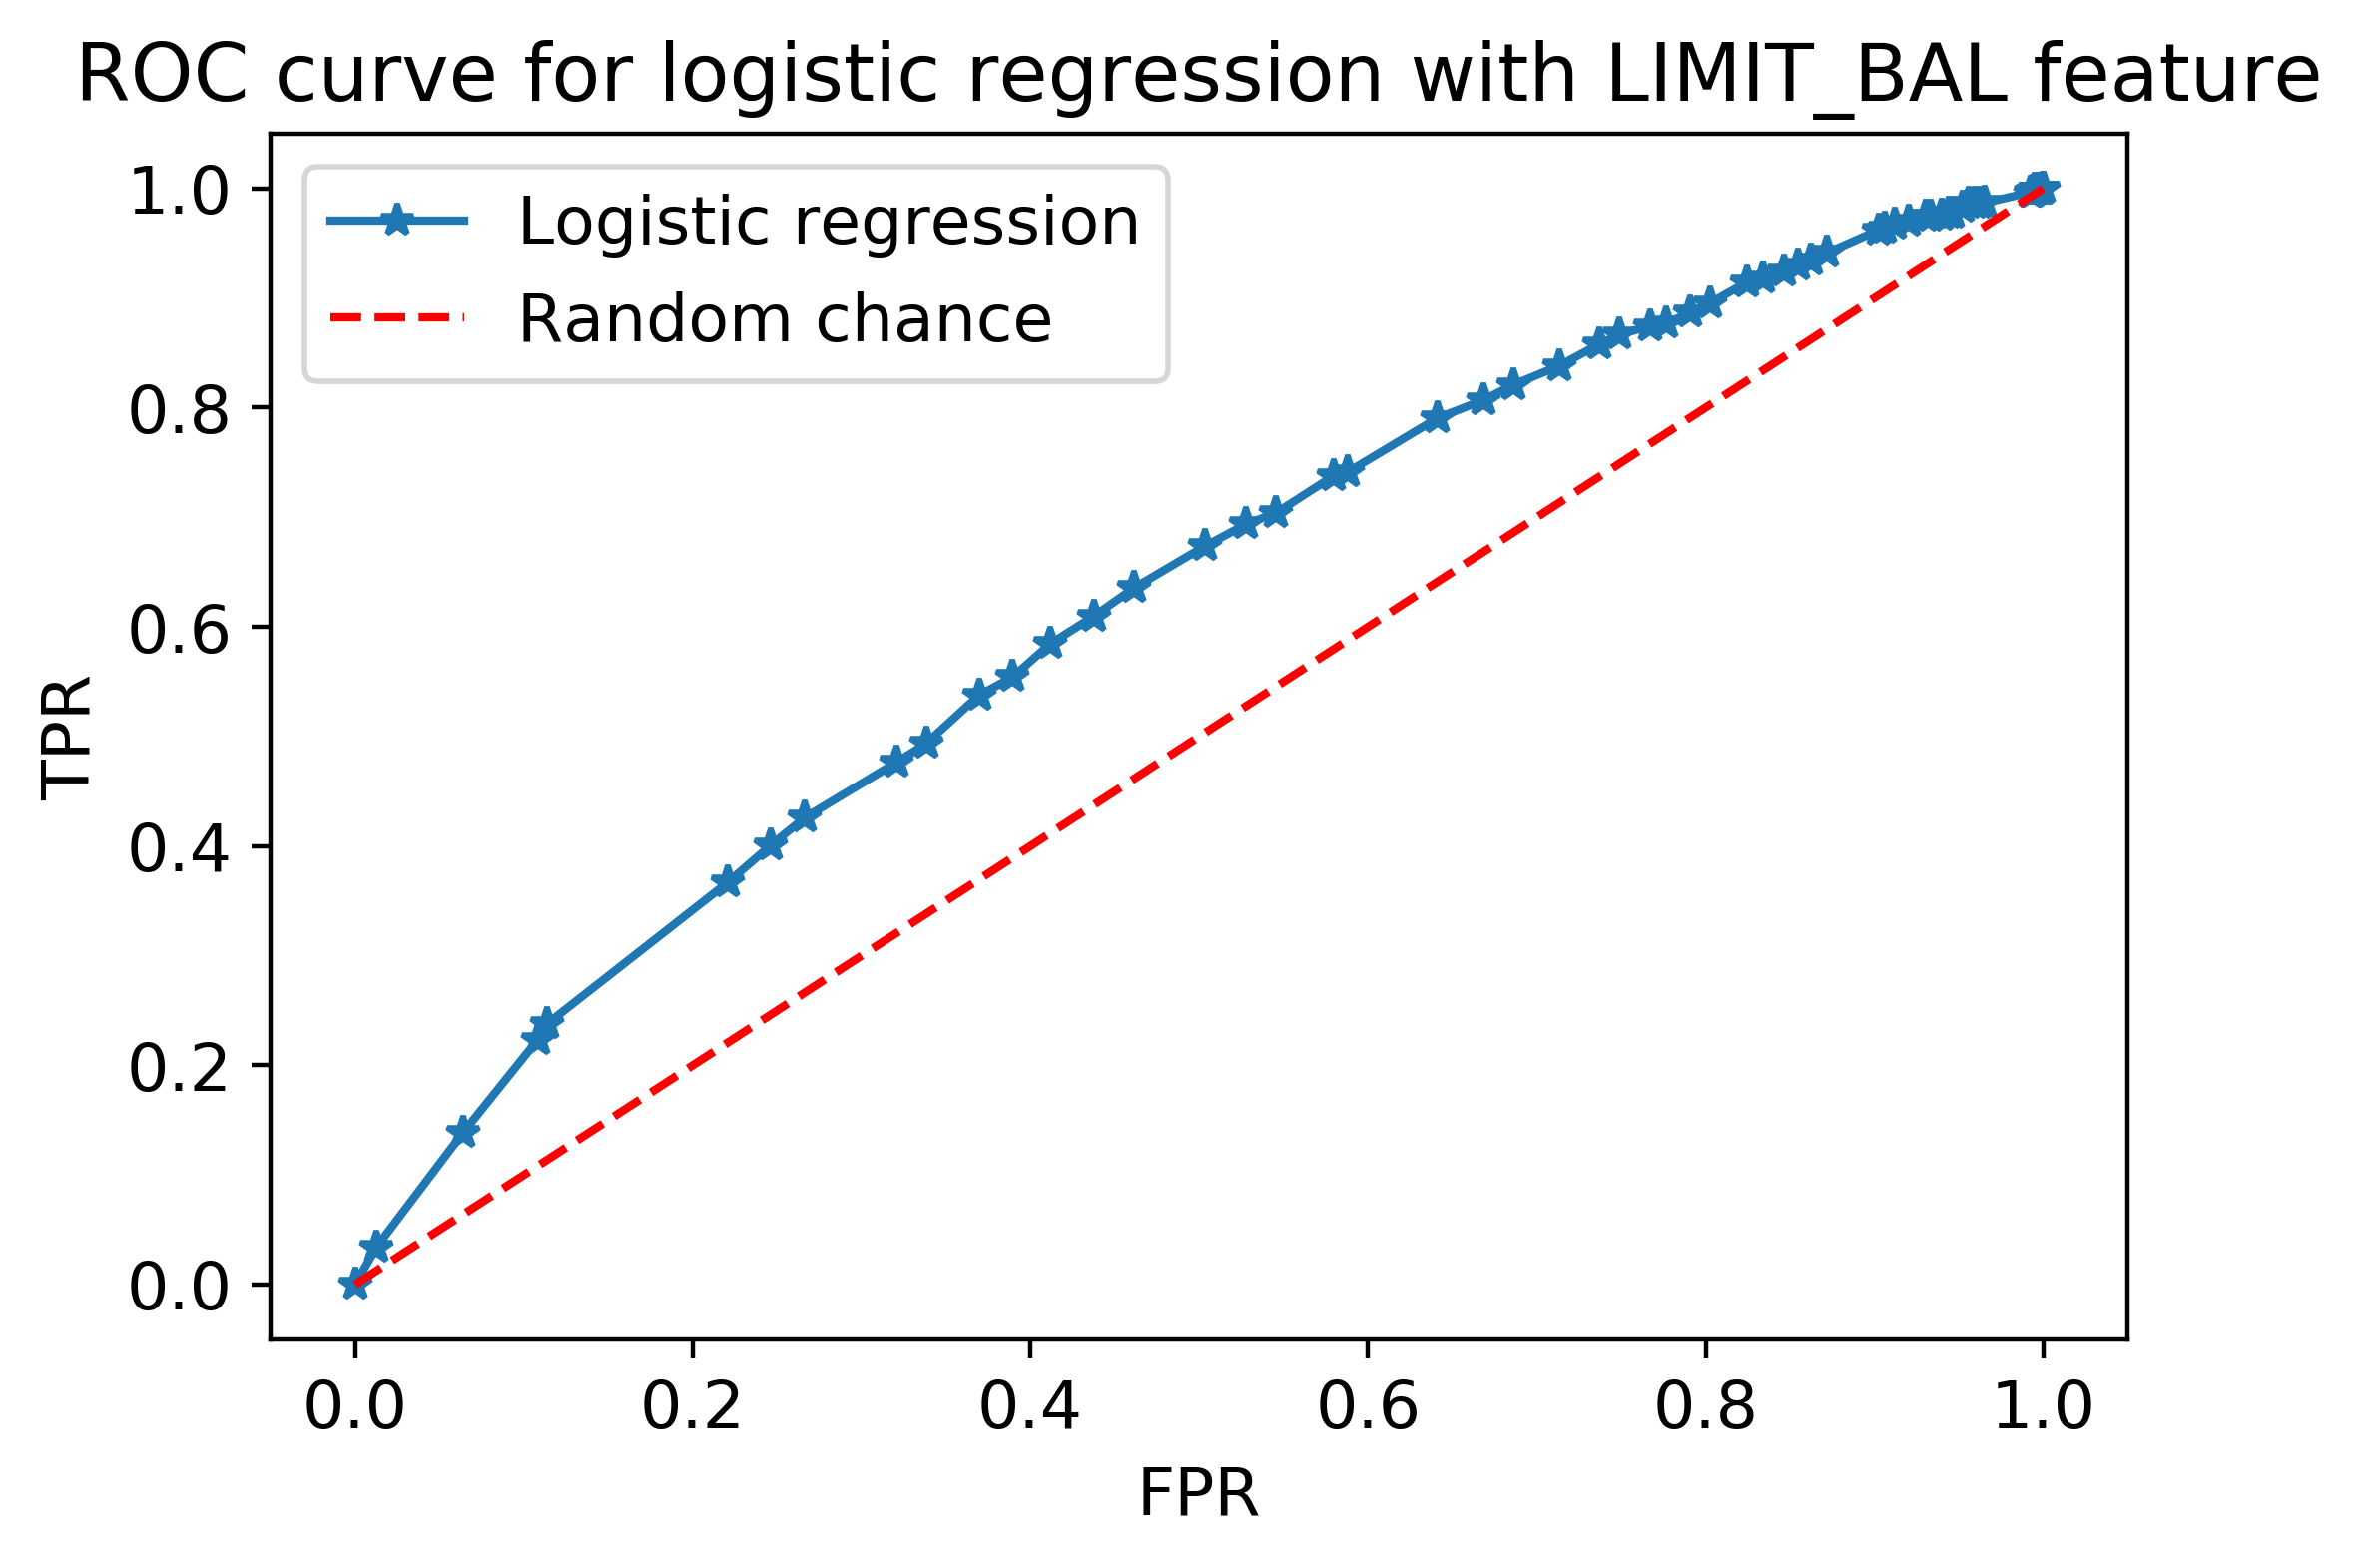

In [86]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [87]:
metrics.roc_auc_score(y_test, pos_prob)

0.6201990844642832

#### Education Feature

In [88]:
X_new=data['EDUCATION'].values.reshape(-1,1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new,y,test_size=0.2, random_state=24)

In [89]:
model.fit(X_train_2,y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred_prob_2 = model.predict_proba(X_test_2)
metrics.roc_auc_score(y_test_2, y_pred_prob_2[:,1])

0.5434650477972642

Text(0.5, 1.0, 'ROC curve for logistic regression with EDUCATION feature')

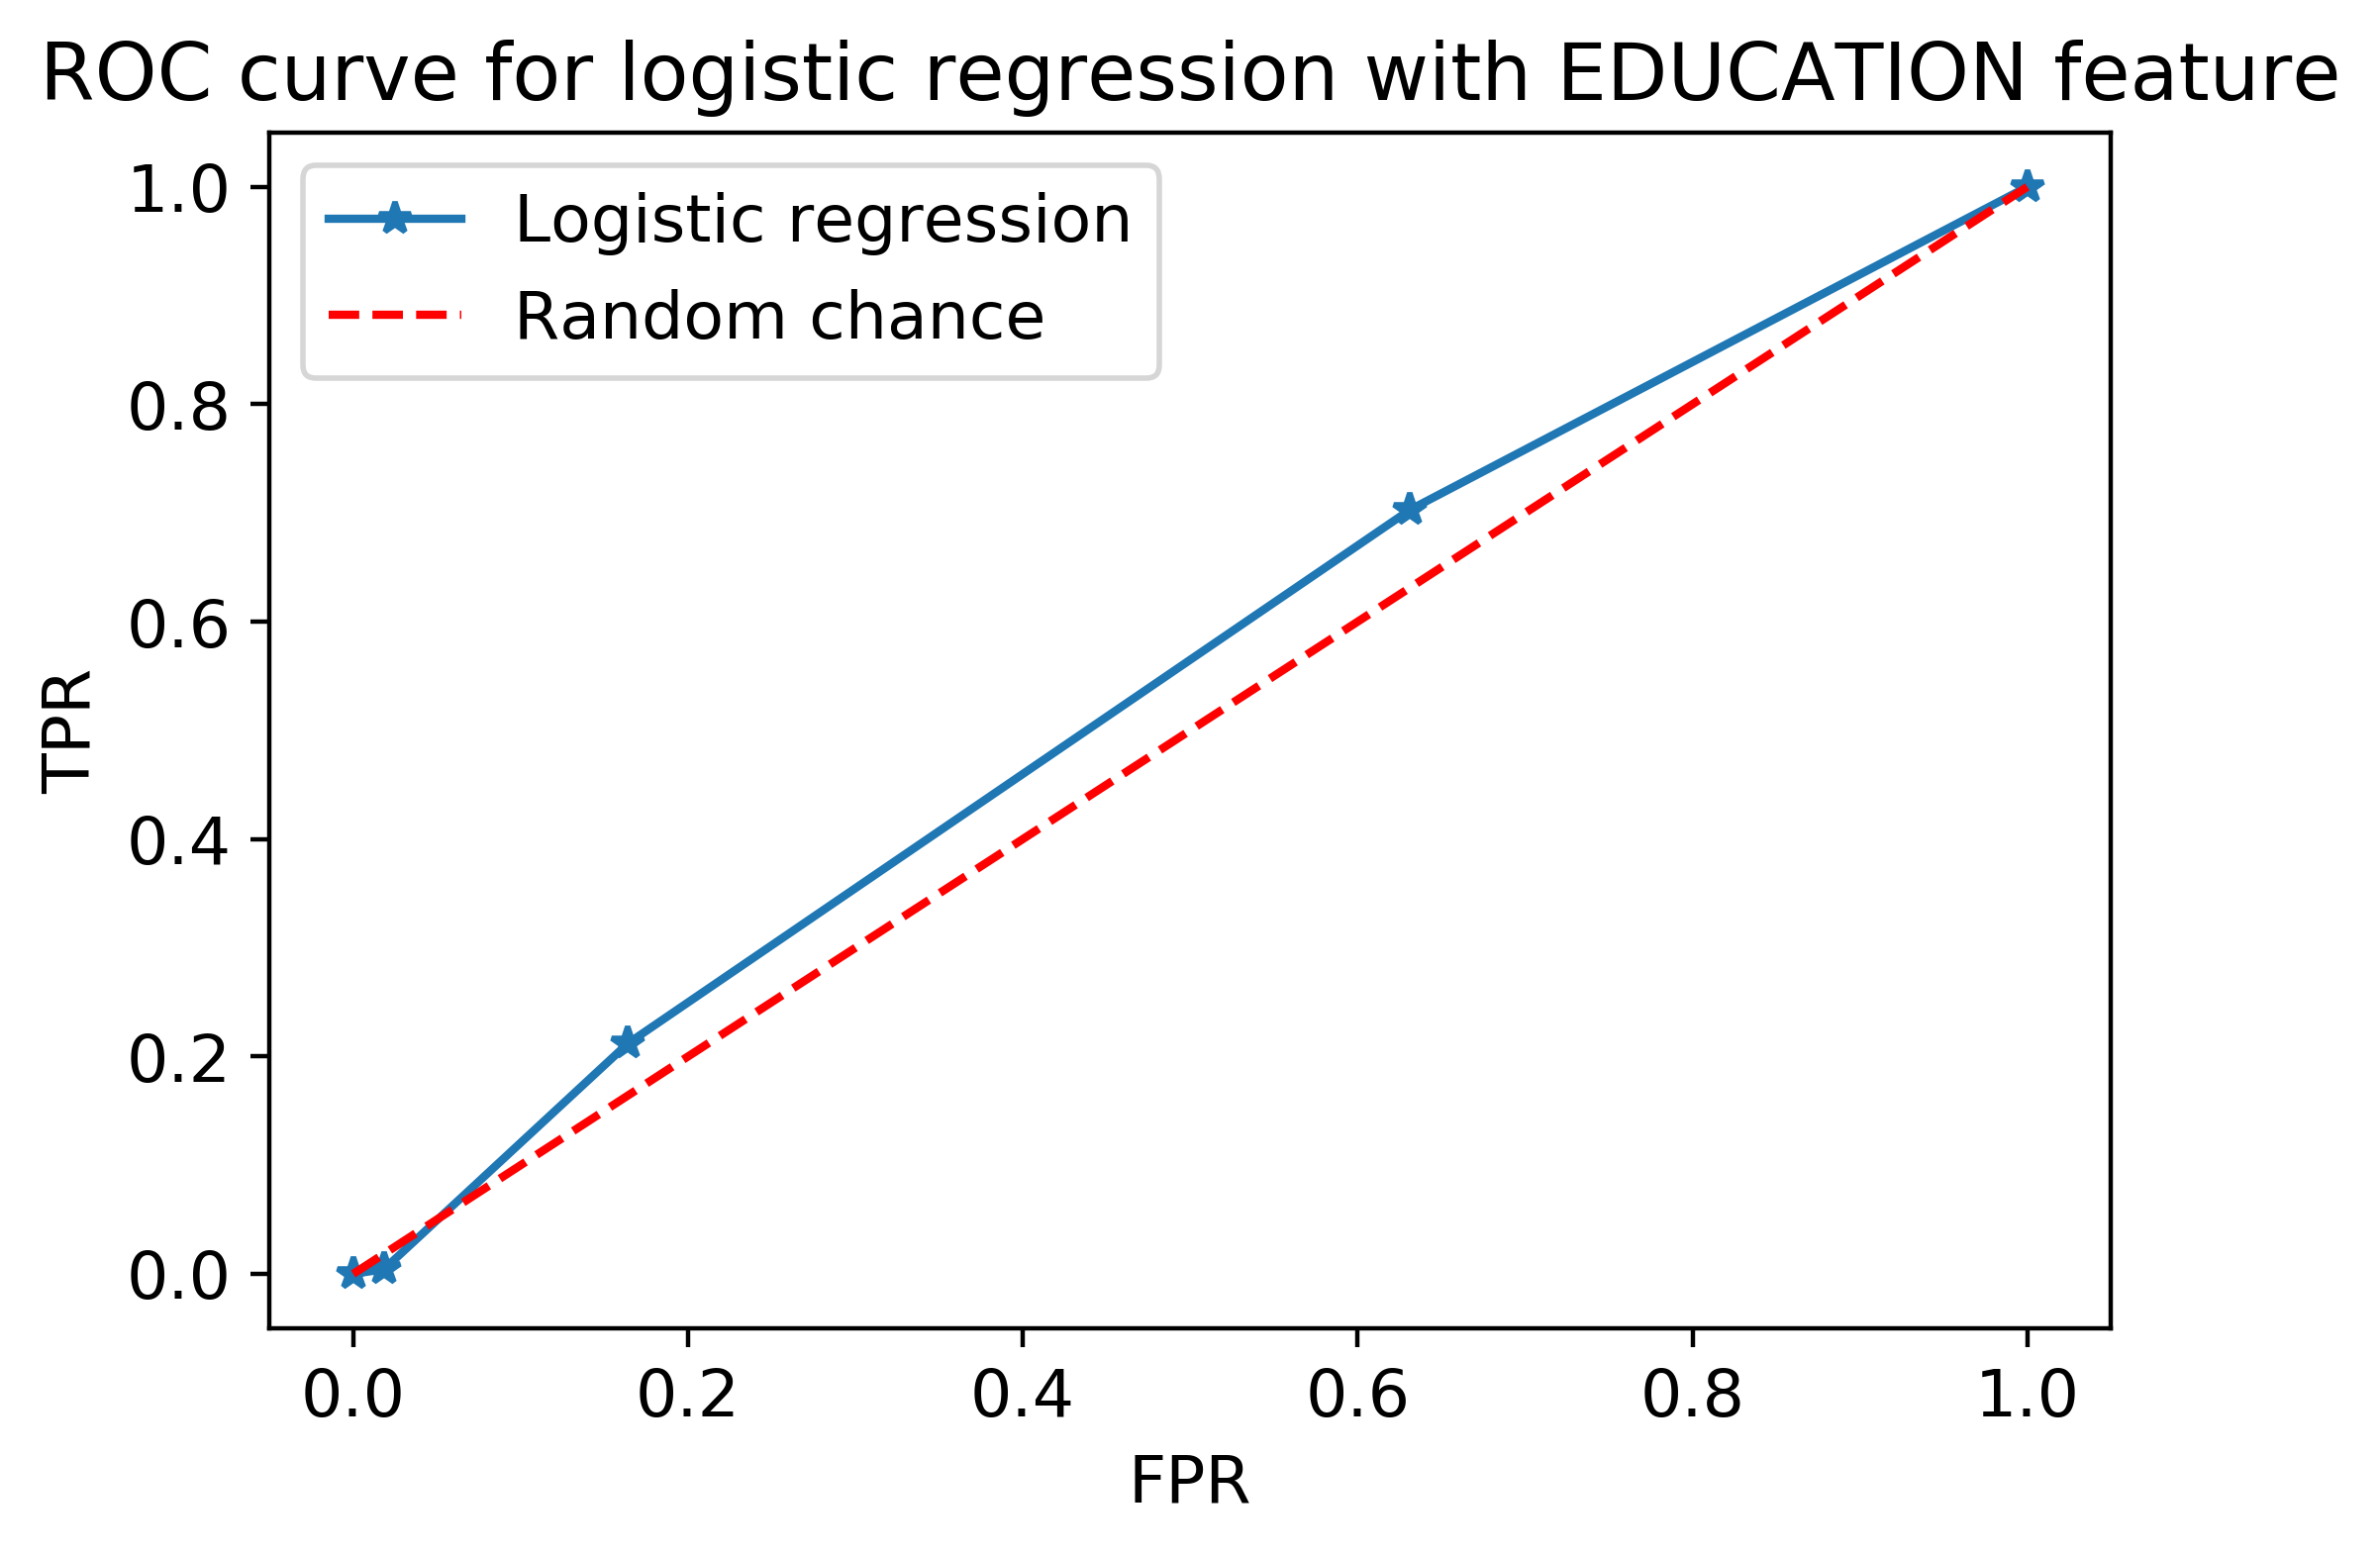

In [91]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_pred_prob_2[:,1])

plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with EDUCATION feature')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [92]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test,pos_prob)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision-recall curve for limit_bal')

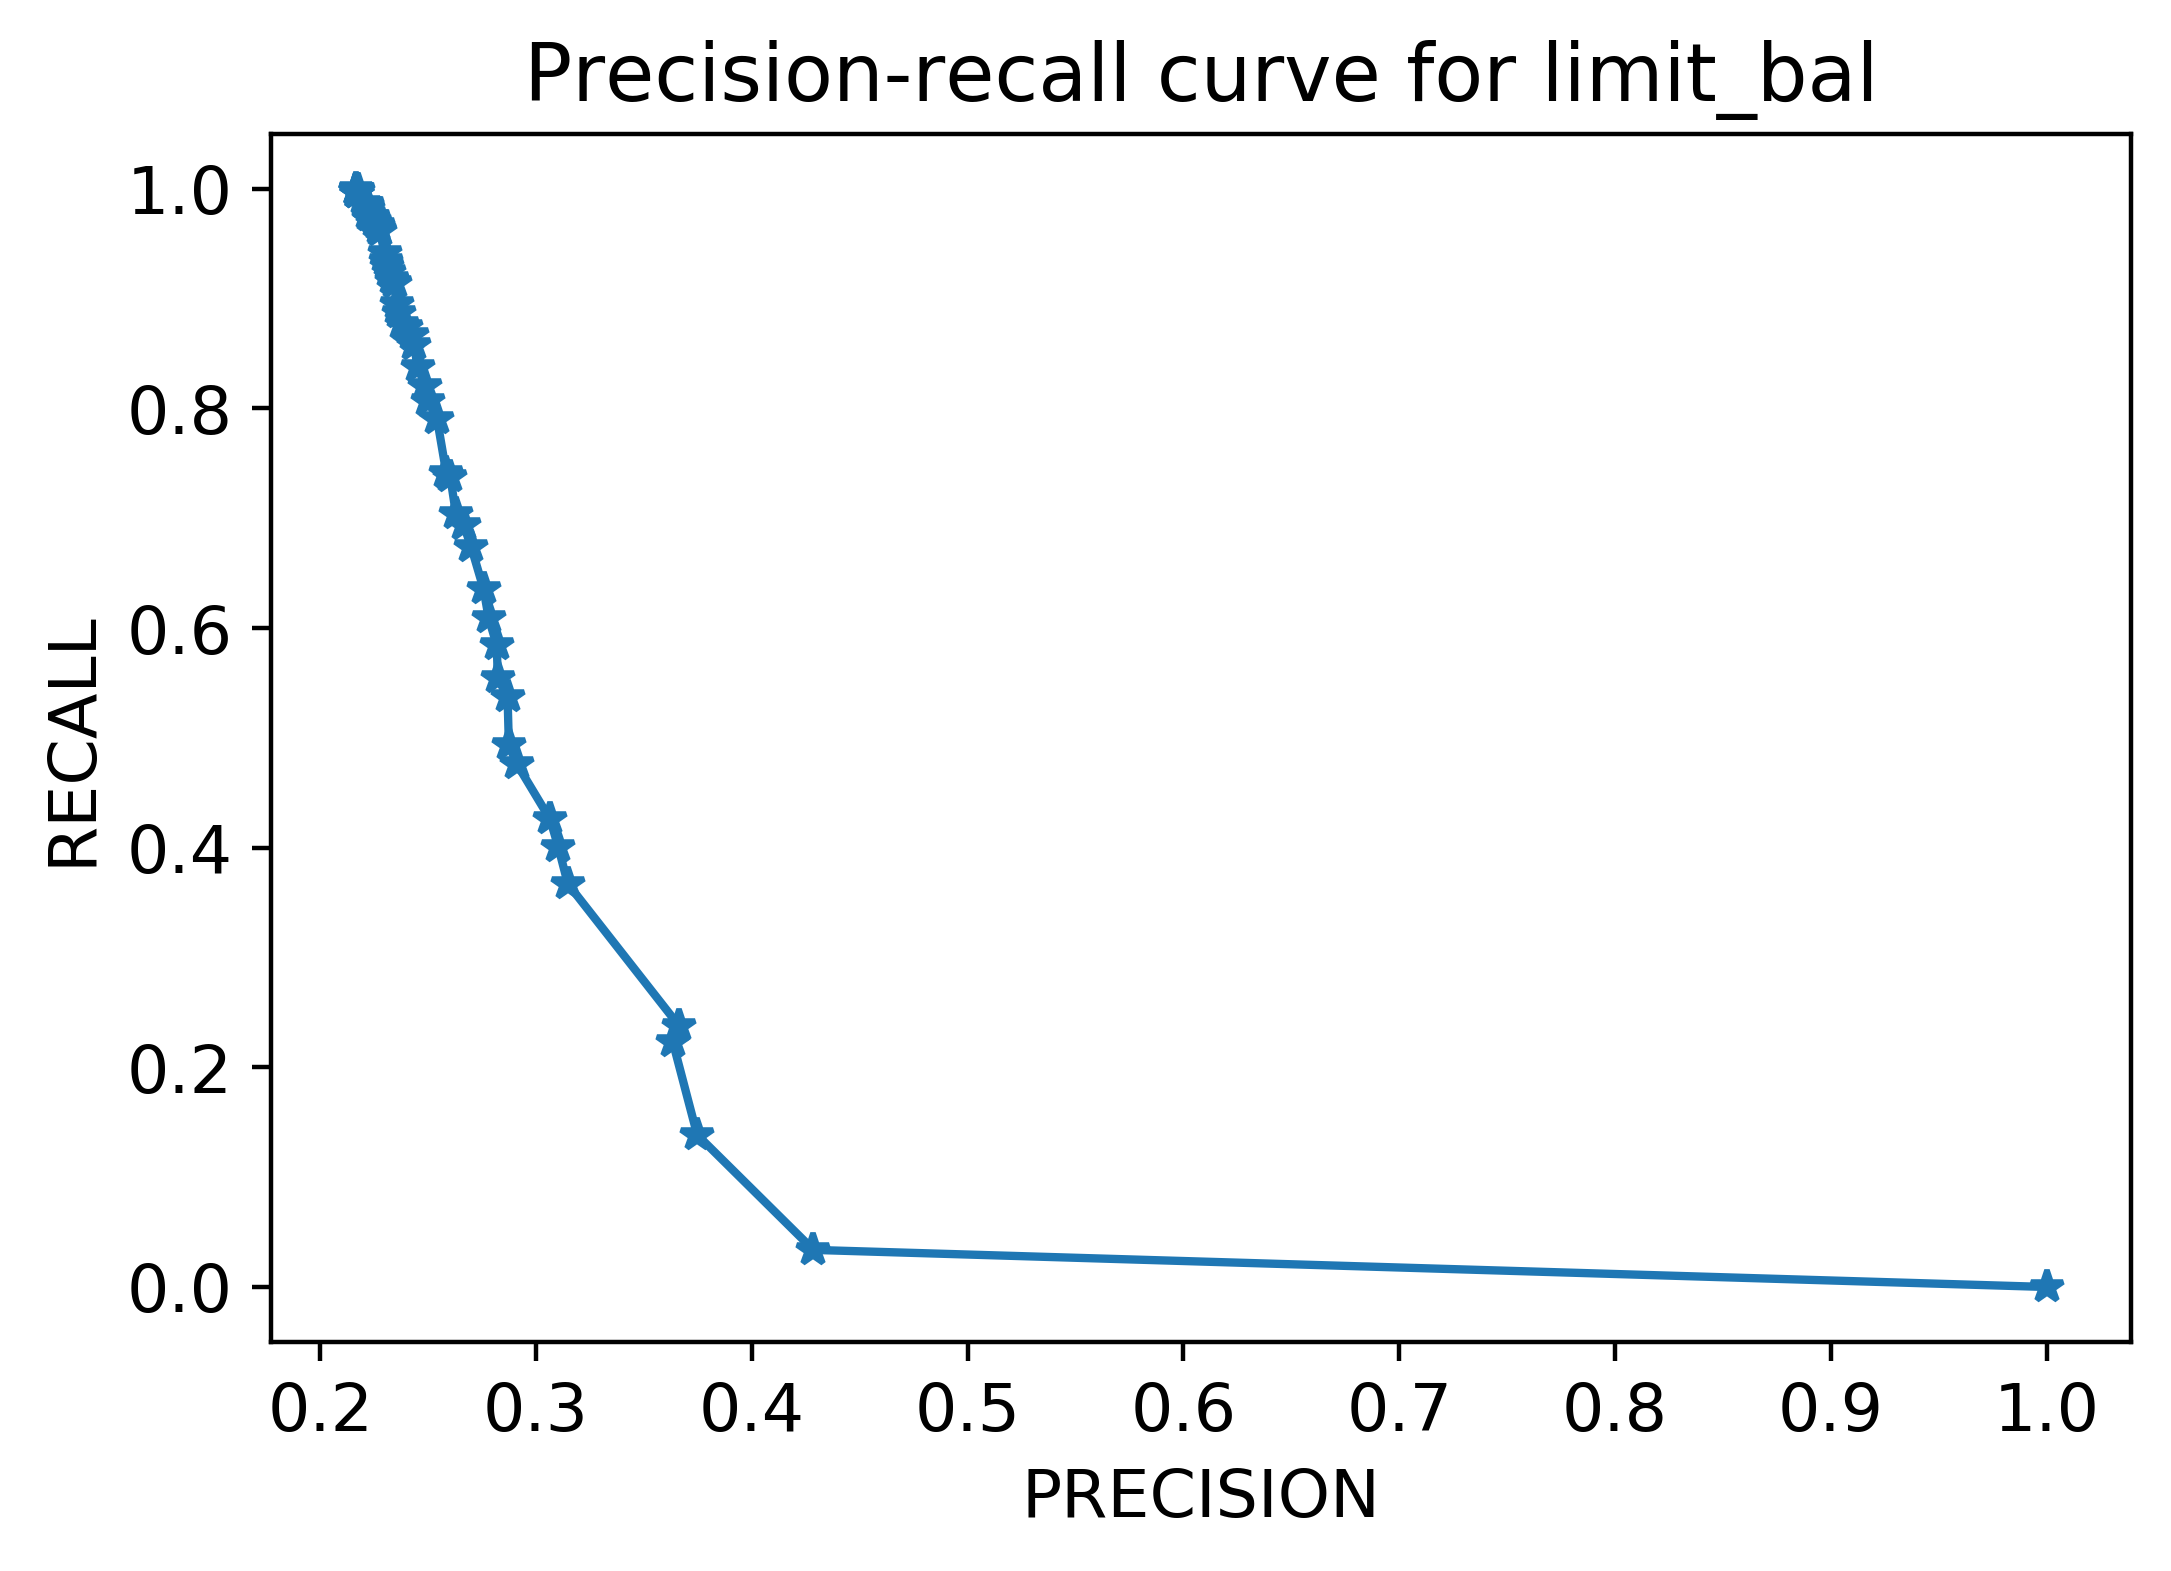

In [101]:
plt.plot(precision, recall, '*-')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve for limit_bal')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [98]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [99]:
#education feature
y_train2_pred_prob=model.predict_proba(X_train_2)
metrics.roc_auc_score(y_train_2, y_train2_pred_prob[:,1])

0.524406580628231

In [100]:
#limit_bal feature
y_train_pred_prob=model.predict_proba(X_train)
metrics.roc_auc_score(y_train, y_train_pred_prob[:,1])

0.5

    How is this different, conceptually and quantitatively, from your earlier calculation?
